In [107]:
#Import the required libraries and modules that you would need.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import model_selection
from sklearn import metrics as metrics
from sklearn import preprocessing
from sklearn import linear_model as lm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

%matplotlib inline

In [44]:
def rename_columns(df, dictionary_oldname_newname):
    print(str(dictionary_oldname_newname))
    df.rename(columns=dictionary_oldname_newname, inplace=True )
    return True

def drop_columns(df, list_column_names) :

    df.drop(columns=list_column_names, axis=1, inplace=True)
    return True

def lower_case_column_names(df):
    df.columns=[i.lower() for i in df.columns]
    return True

def lower_case_text_fields(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: str(x).lower())
    return True

def df_info(field, df):
    print(column + "\n")
    print(field + " nAns: " + str(len(df.loc[df[field].isnull()])) )
    if(str(df[field].dtypes)=='object'):
        print(str(df[field].value_counts()))
    print("\n")
        
def dummyfy(field, df):
    dummies = pd.get_dummies(df[field].to_frame() , columns=[field])
    return dummies.iloc[: , 1:]

def join_categories(df_categories, df_join_to):
    for column in df_categories:
        df_dummiefied = dummyfy(column, df_categories)
        df_join_to = pd.concat([df_join_to, df_dummiefied], axis=1, join="inner")
    return df_join_to

In [6]:
#Read that data into Python and call the dataframe churnData.
churnData = pd.read_csv('DATA_Customer-Churn.csv')
churn = churnData #I prefer it this way :P

In [66]:
churn

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [8]:
#Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [9]:
churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
churn["TotalCharges"] = pd.to_numeric(churn["TotalCharges"], errors='coerce')

In [11]:
# No dropping of duplicates. Given the selection of data, 
# they'd be quite possible

#churn.drop_duplicates()

In [12]:
#not on the to do list, but was a stern recommendation
lower_case_column_names(churn)

True

In [13]:
# Check for null values in the dataframe. Replace the null values.

In [14]:
for column in churn:
    df_info(column, churn)


gender

gender nAns: 0
Male      3555
Female    3488
Name: gender, dtype: int64


seniorcitizen

seniorcitizen nAns: 0


partner

partner nAns: 0
No     3641
Yes    3402
Name: partner, dtype: int64


dependents

dependents nAns: 0
No     4933
Yes    2110
Name: dependents, dtype: int64


tenure

tenure nAns: 0


phoneservice

phoneservice nAns: 0
Yes    6361
No      682
Name: phoneservice, dtype: int64


onlinesecurity

onlinesecurity nAns: 0
No                     3498
Yes                    2019
No internet service    1526
Name: onlinesecurity, dtype: int64


onlinebackup

onlinebackup nAns: 0
No                     3088
Yes                    2429
No internet service    1526
Name: onlinebackup, dtype: int64


deviceprotection

deviceprotection nAns: 0
No                     3095
Yes                    2422
No internet service    1526
Name: deviceprotection, dtype: int64


techsupport

techsupport nAns: 0
No                     3473
Yes                    2044
No internet service    1

In [15]:
#found 'em
churn.drop(churn.loc[churn['totalcharges'].isnull()].index, inplace=True)

In [16]:
df_info('totalcharges', churn)

churn

totalcharges nAns: 0




In [17]:
dummyfy('partner', churn)

,partner_Yes
0,1
1,0
2,0
3,0
4,0
...,...
7038,1
7039,1
7040,1
7041,1


In [18]:
churn_xy =  churn['tenure'].to_frame() + dummyfy('seniorcitizen', churn) + churn['monthlycharges'].to_frame()+ churn['totalcharges'].to_frame()

In [19]:
churn_xy  = pd.concat([churn['tenure'].to_frame(),dummyfy('seniorcitizen', churn),churn['monthlycharges'].to_frame(),churn['totalcharges'].to_frame()], ignore_index = False, axis = 0)


In [20]:
senior = dummyfy('seniorcitizen', churn)
senior

,seniorcitizen_1
0,0
1,0
2,0
3,0
4,0
...,...
7038,0
7039,0
7040,0
7041,1


In [21]:
churn_xy = churn['tenure'].to_frame()
churn_xy = churn_xy.join(senior)
churn_xy = churn_xy.join(churn['monthlycharges'].to_frame())
churn_xy = churn_xy.join(churn['totalcharges'].to_frame())
churn_xy = churn_xy.join(dummyfy('churn', churn))

In [22]:
churn_xy

,tenure,seniorcitizen_1,monthlycharges,totalcharges,churn_Yes
0,1,0,29.85,29.85,0
1,34,0,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,0,42.30,1840.75,0
4,2,0,70.70,151.65,1
...,...,...,...,...,...
7038,24,0,84.80,1990.50,0
7039,72,0,103.20,7362.90,0
7040,11,0,29.60,346.45,0
7041,4,1,74.40,306.60,1


In [23]:
X=churn_xy.drop('churn_Yes', axis=1)
y=churn_xy['churn_Yes']

In [24]:
X

,tenure,seniorcitizen_1,monthlycharges,totalcharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [25]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn_Yes, Length: 7032, dtype: uint8

In [26]:
log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [27]:
X_train.dtypes

tenure               int64
seniorcitizen_1      uint8
monthlycharges     float64
totalcharges       float64
dtype: object

,Error_metric,Train,Test
0,Accuracy,0.80,0.77
1,Precision,0.66,0.65
2,Recall,0.46,0.43


Confusion matrix for the train set
[[3801  353]
 [ 797  674]]


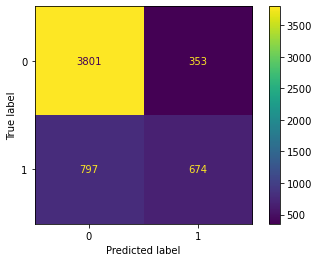



Confusion matrix for the test set
[[918  91]
 [226 172]]


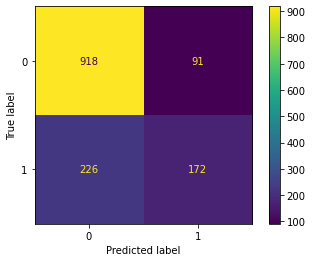

In [40]:
# Fit a logistic Regression model on the training data.
scaler = StandardScaler()

scaler.fit(X_train)

X_train_mod = scaler.transform(X_train)
X_test_mod  = scaler.transform(X_test)


log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

<BarContainer object of 4 artists>

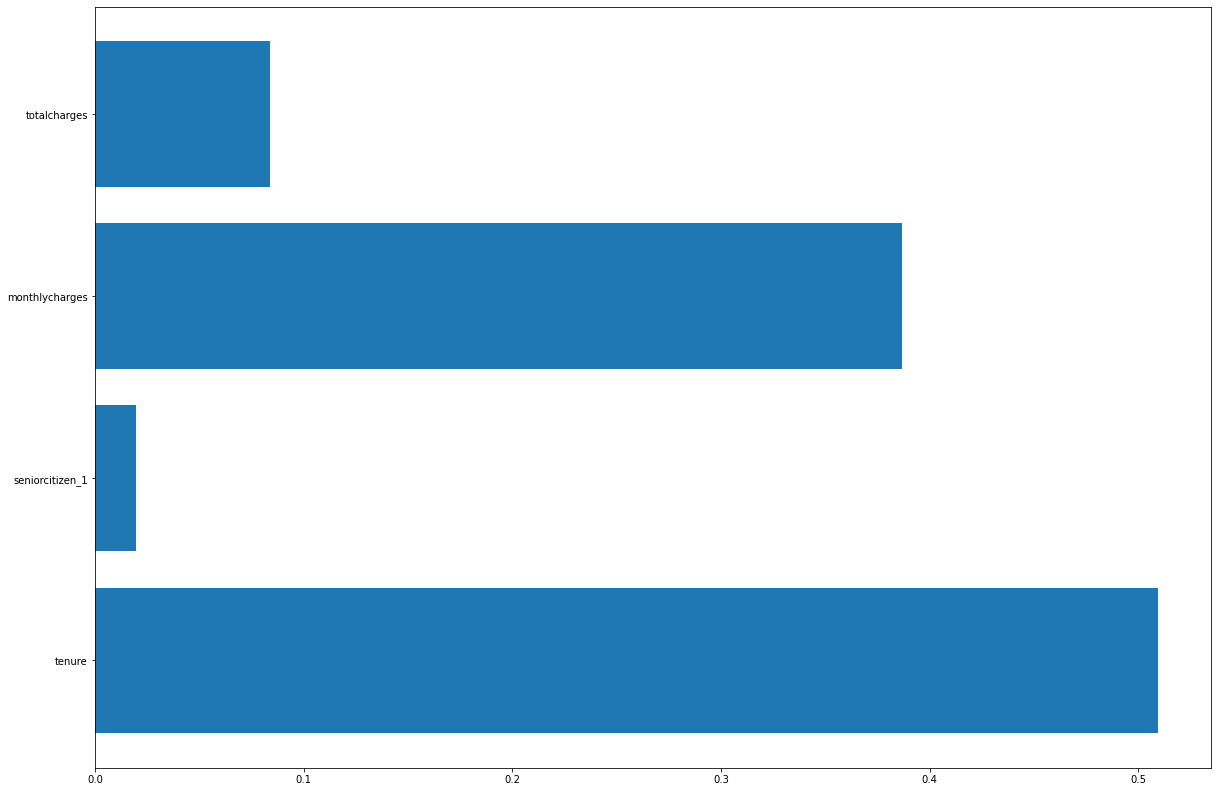

In [41]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

array([0.78976487, 0.76763485, 0.78146611, 0.75518672, 0.76210235,
       0.75656985, 0.78699862, 0.77731674, 0.78393352, 0.7867036 ])

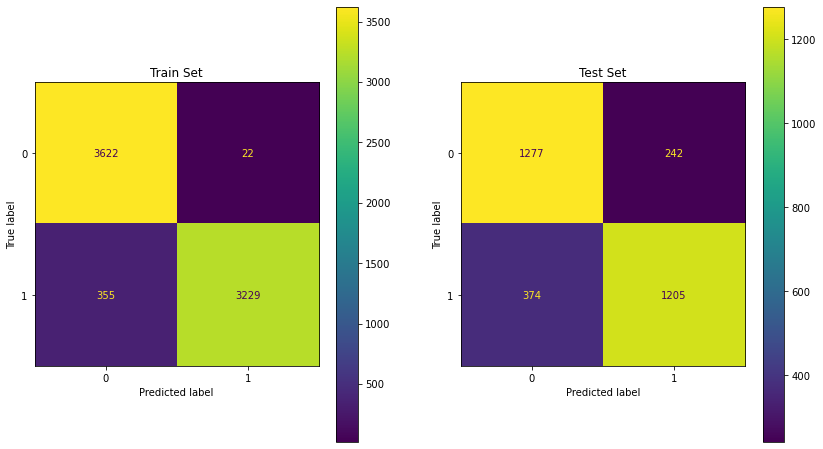

In [117]:
#Fit a Knn Classifier model on the training data

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2,weights='uniform')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

scores=cross_val_score(model, X_train, y_train, cv=10)
display(scores)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

## calling the function
error_metrics_df,y_train_vs_predicted, \
    y_test_vs_predicted=evaluate_classification_model(y_train, y_pred_train,
                                                    y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.87,0.72
1,Precision,0.99,0.51
2,Recall,0.50,0.23


,Error_metric,Train,Test
0,Accuracy,0.76,0.75
1,Precision,0.73,0.73
2,Recall,0.82,0.81


array([0.75795297, 0.76210235, 0.75518672, 0.74965422, 0.73720609,
       0.71784232, 0.73858921, 0.76348548, 0.74099723, 0.74792244])

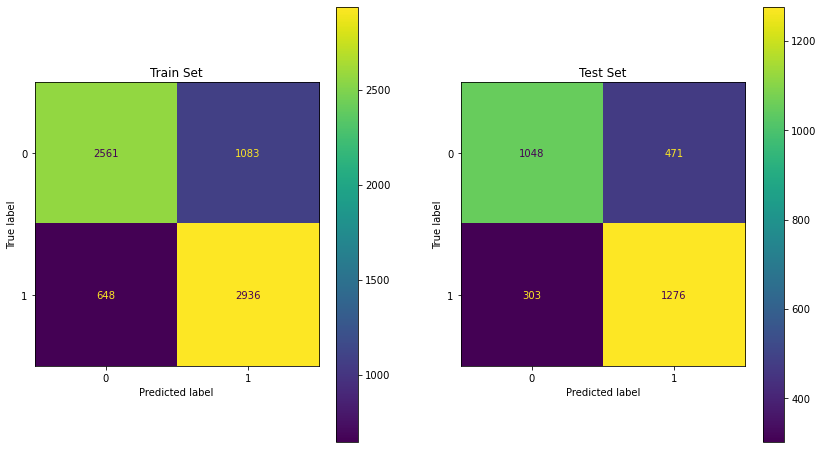

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=5)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

scores=cross_val_score(model, X_train, y_train, cv=10)
display(scores)

<BarContainer object of 4 artists>

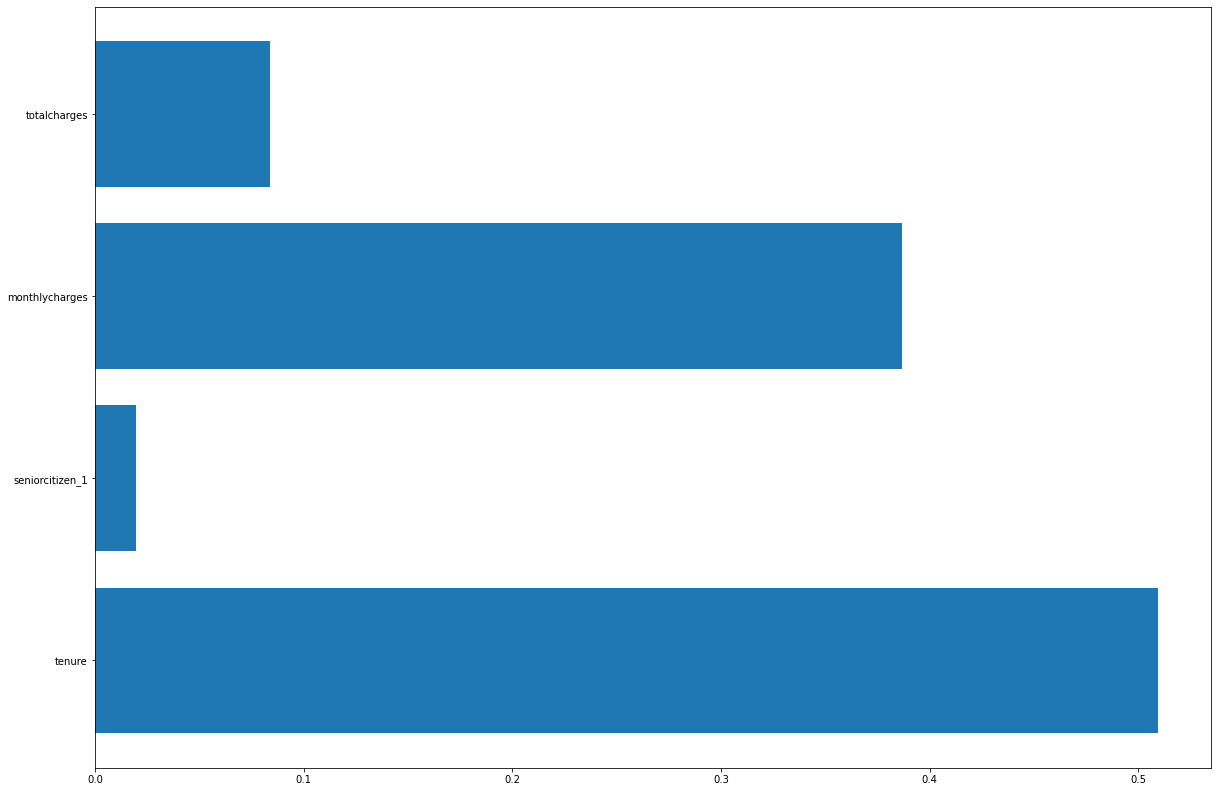

In [35]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

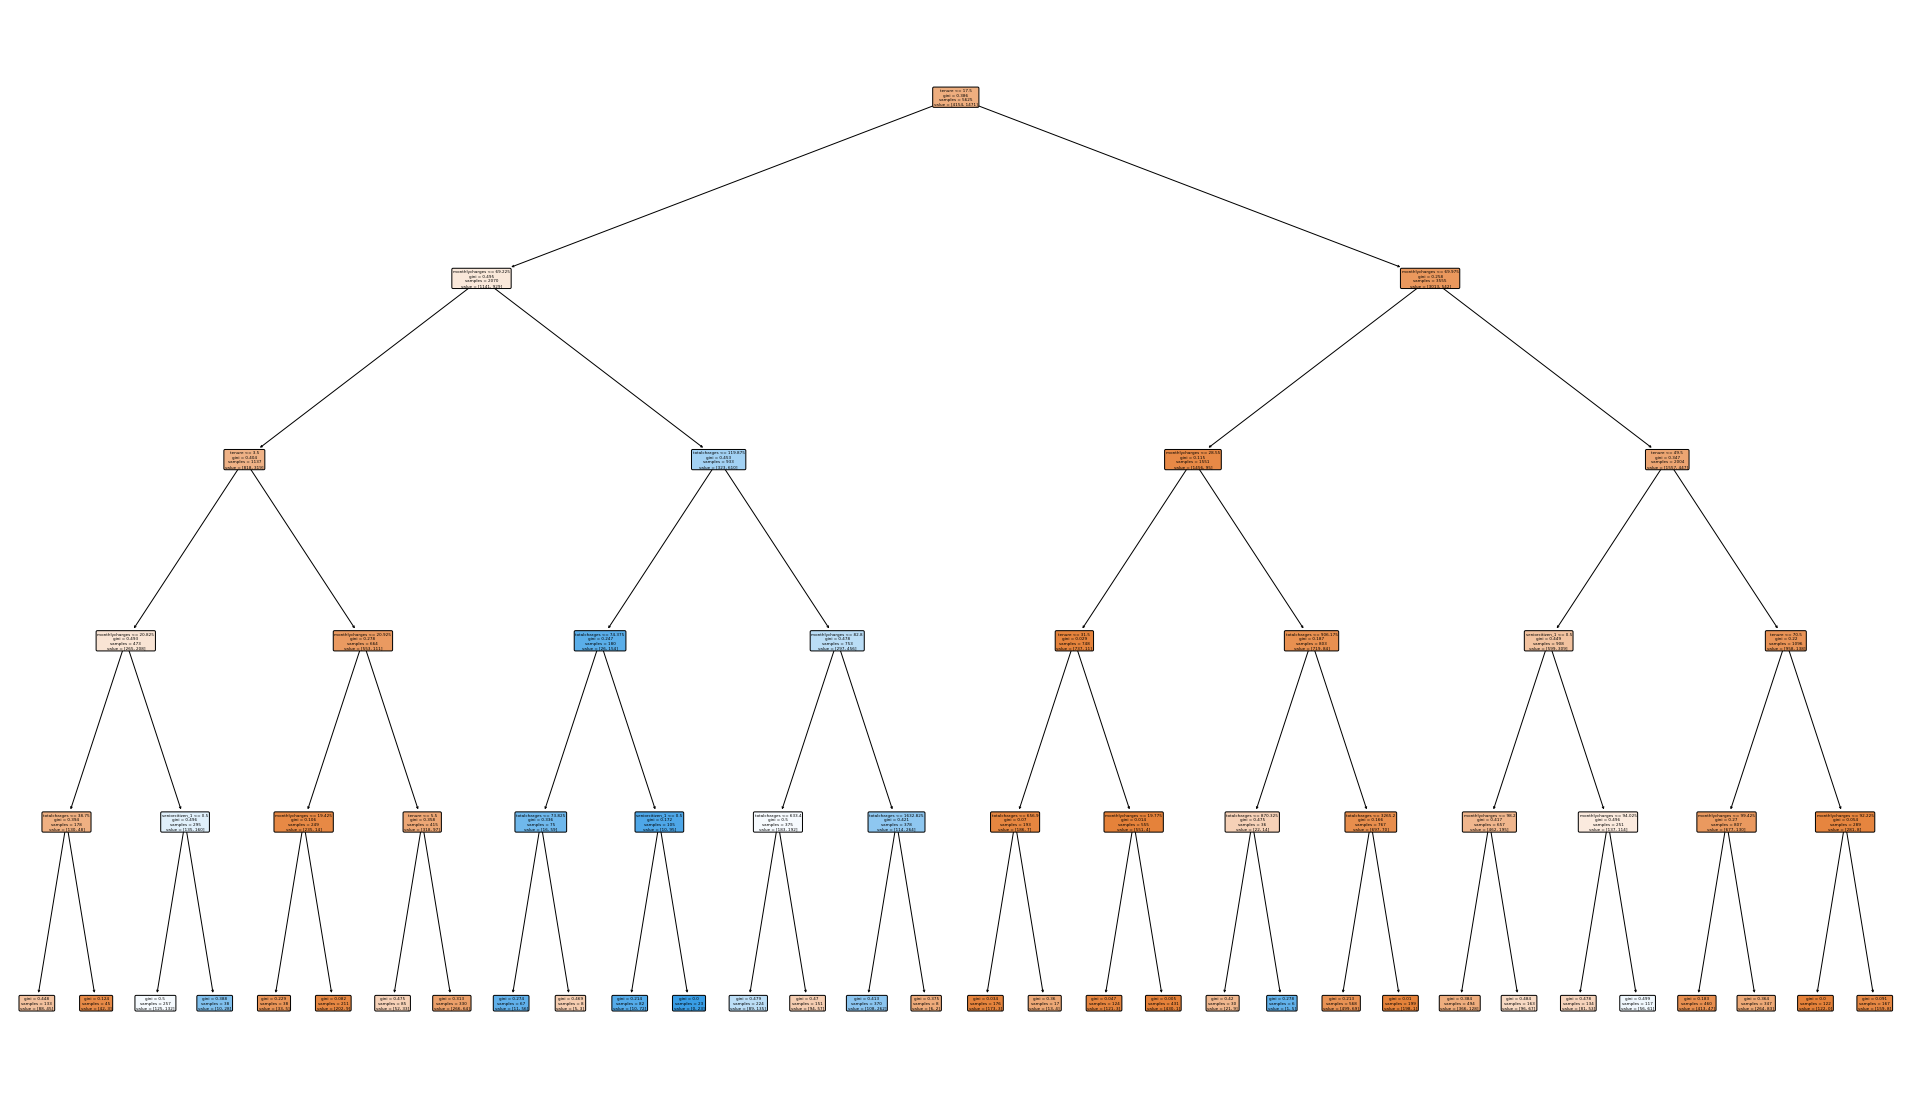

In [36]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

In [46]:
# get all numerical colors in one dataframe
churn_numbers = churn.select_dtypes(np.number)

In [47]:
# and get all categorical data in another
churn_categories = churn.select_dtypes(object)


In [48]:
full_churn = join_categories(churn_categories, churn_numbers)

In [49]:
full_churn

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0,2,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,0,1,0,1,1,0,0
7039,0,72,103.20,7362.90,0,1,1,1,0,0,...,1,0,0,0,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
X=full_churn.drop('churn_Yes', axis=1)
y=full_churn['churn_Yes']

,Error_metric,Train,Test
0,Accuracy,0.76,0.75
1,Precision,0.73,0.73
2,Recall,0.82,0.81


array([0.75795297, 0.76210235, 0.75518672, 0.74965422, 0.73720609,
       0.7164592 , 0.73858921, 0.76348548, 0.74099723, 0.74792244])

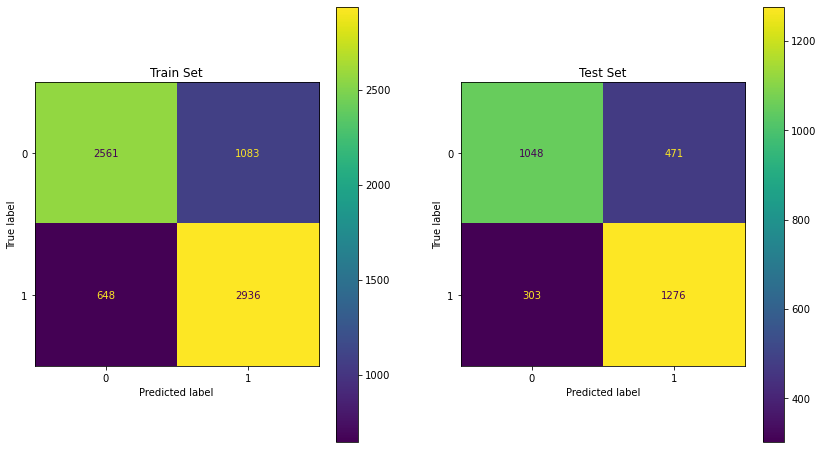

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=5)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

scores=cross_val_score(model, X_train, y_train, cv=10)
display(scores)

<BarContainer object of 22 artists>

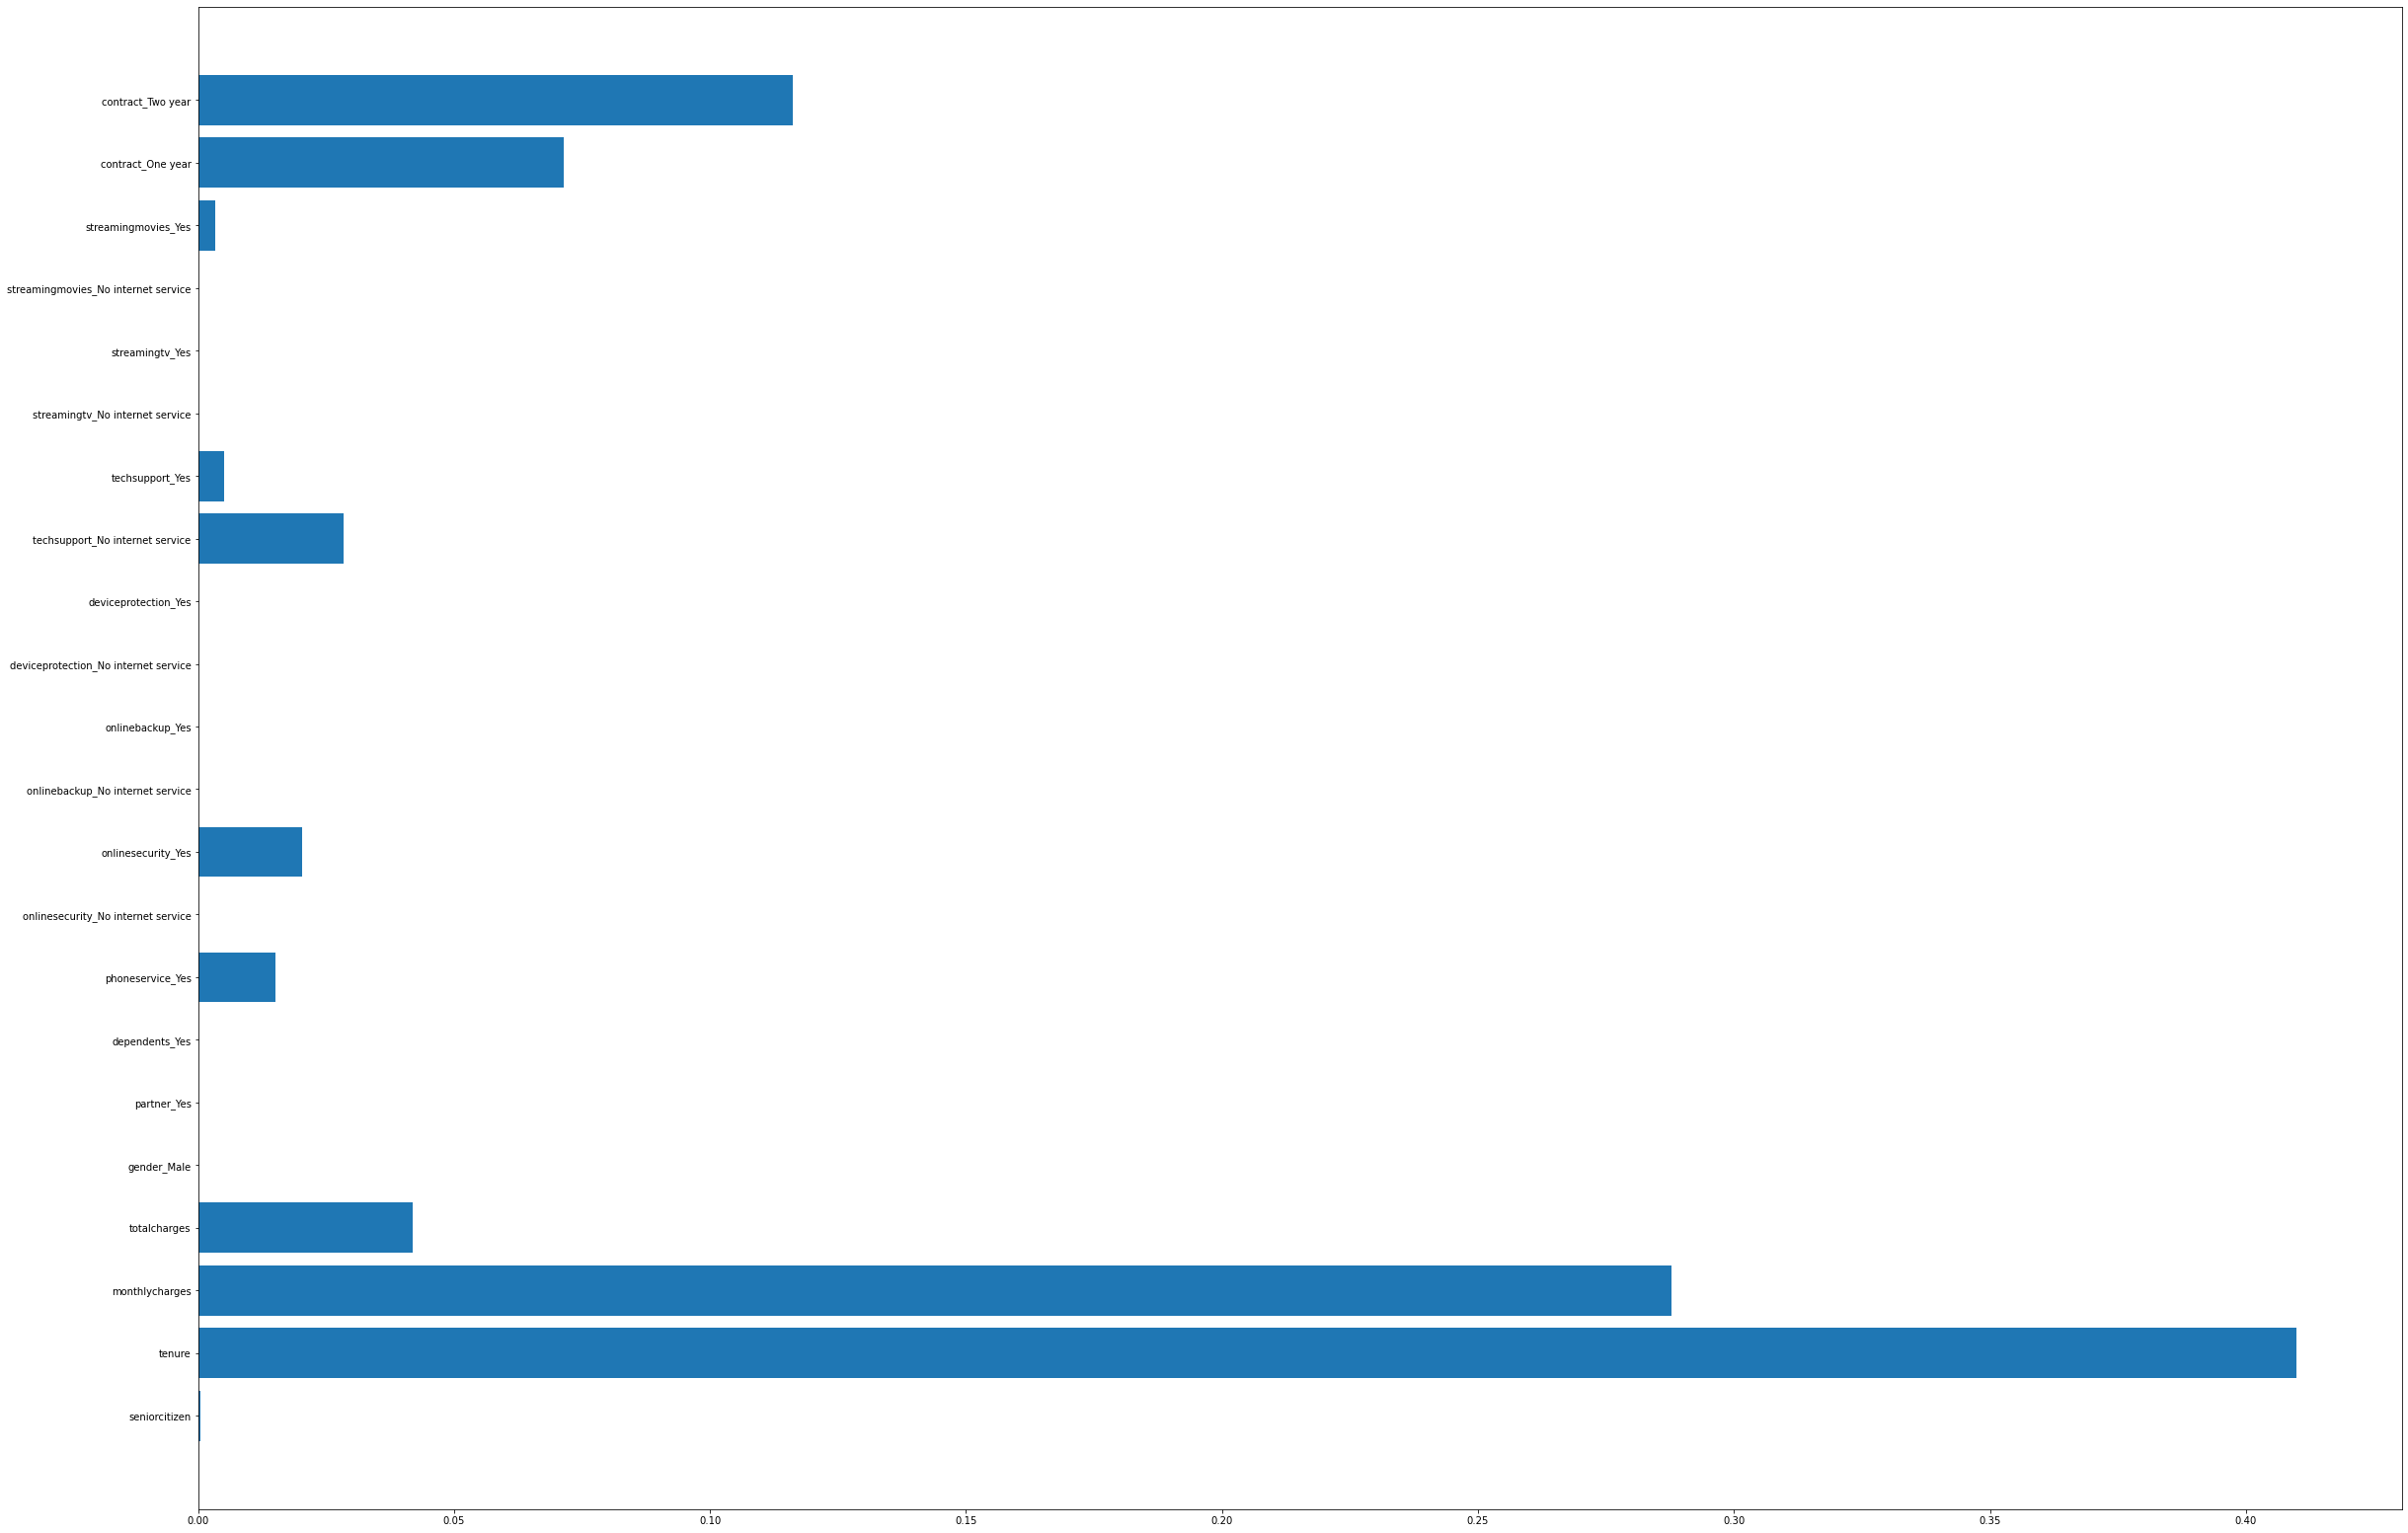

In [53]:
plt.figure(figsize=(40,28))
plt.barh(X.columns,model.feature_importances_)

In [76]:
churn_categories = churn.select_dtypes(object)
drop_columns(churn_categories, ['deviceprotection', 'onlinebackup', 'gender', 'partner', 'dependents'])
#churn_categories

True

In [77]:
churn_categories

,phoneservice,onlinesecurity,techsupport,streamingtv,streamingmovies,contract,churn
0,No,No,No,No,No,Month-to-month,No
1,Yes,Yes,No,No,No,One year,No
2,Yes,Yes,No,No,No,Month-to-month,Yes
3,No,Yes,Yes,No,No,One year,No
4,Yes,No,No,No,No,Month-to-month,Yes
...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,Yes,One year,No
7039,Yes,No,No,Yes,Yes,One year,No
7040,No,Yes,No,No,No,Month-to-month,No
7041,Yes,No,No,No,No,Month-to-month,Yes


In [78]:
partial_churn =  join_categories(churn_categories, churn_numbers)

In [79]:
X=partial_churn.drop('churn_Yes', axis=1)
y=partial_churn['churn_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)


,Error_metric,Train,Test
0,Accuracy,0.76,0.77
1,Precision,0.74,0.76
2,Recall,0.79,0.81


Confusion matrix for the train set
[[2630 1014]
 [ 741 2843]]


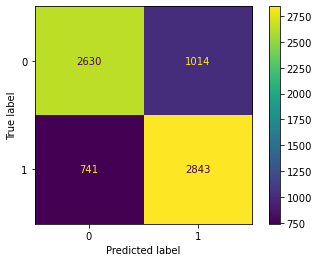



Confusion matrix for the test set
[[1111  408]
 [ 299 1280]]


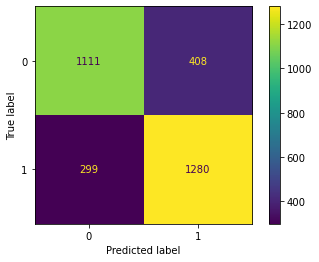

array([0.78976487, 0.76763485, 0.78146611, 0.75518672, 0.76210235,
       0.75656985, 0.78699862, 0.77731674, 0.78393352, 0.7867036 ])

In [114]:
# Fit a logistic Regression model on the training data.
scaler = StandardScaler()

scaler.fit(X_train)

X_train_mod = scaler.transform(X_train)
X_test_mod  = scaler.transform(X_test)


log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

scores=cross_val_score(model, X_train, y_train, cv=10)
display(scores)

,Error_metric,Train,Test
0,Accuracy,0.81,0.79
1,Precision,0.66,0.65
2,Recall,0.55,0.52


array([0.78976487, 0.76763485, 0.78146611, 0.75518672, 0.76210235,
       0.75656985, 0.78699862, 0.77731674, 0.78393352, 0.7867036 ])

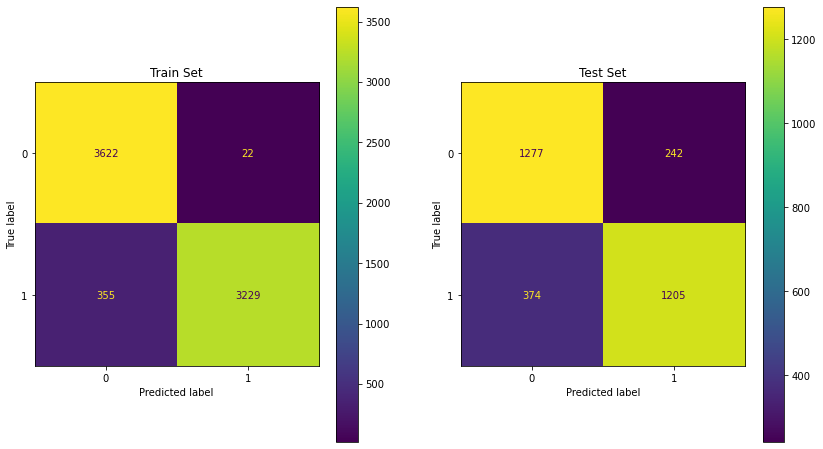

In [113]:
#Fit a Knn Classifier model on the training data

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2,weights='uniform')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

display(performance_log)

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

scores=cross_val_score(model, X_train, y_train, cv=10)
display(scores)

# Downsampling

In [89]:
downsampled_churn =  join_categories(churn_categories, churn_numbers)

In [90]:
category_0 = downsampled_churn[downsampled_churn['churn_Yes'] == 0]
category_1 = downsampled_churn[downsampled_churn['churn_Yes'] == 1]

In [91]:
category_0_down = category_0.sample(len(category_1,))

In [92]:
downsampled = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
downsampled = downsampled.sample(frac=1)

In [93]:
X=downsampled.drop('churn_Yes', axis=1)
y=downsampled['churn_Yes']

In [94]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)


,Error_metric,Train,Test
0,Accuracy,0.81,0.79
1,Precision,0.66,0.65
2,Recall,0.55,0.52


array([0.78976487, 0.76763485, 0.78146611, 0.75518672, 0.76210235,
       0.75656985, 0.78699862, 0.77731674, 0.78393352, 0.7867036 ])

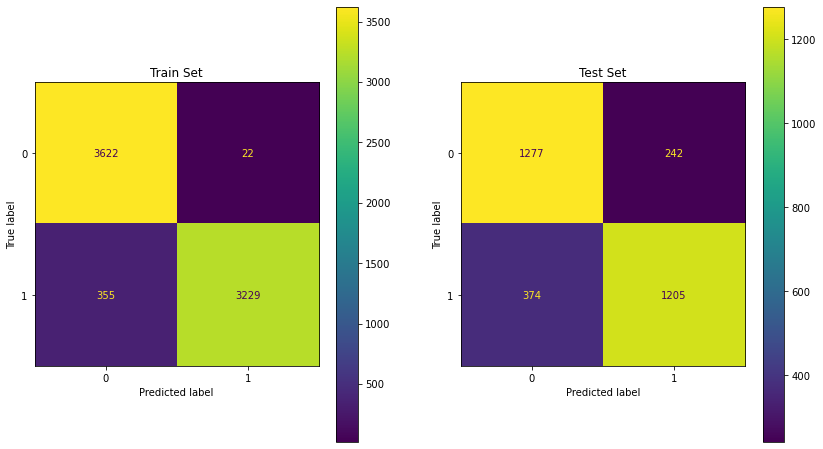

In [112]:
model = KNeighborsClassifier(n_neighbors=2,weights='uniform')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

display(performance_log)

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

scores=cross_val_score(model, X_train, y_train, cv=10)
display(scores)

# Upsampling

In [98]:
upsampled_churn =  join_categories(churn_categories, churn_numbers)


In [99]:
category_0 = upsampled_churn[upsampled_churn['churn_Yes'] == 0]
category_1 = upsampled_churn[upsampled_churn['churn_Yes'] == 1]

In [100]:
category_1_up = category_1.sample(len(category_0), replace=True)

In [101]:
data = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
data = data.sample(frac=1)


In [102]:
X=data.drop('churn_Yes', axis=1)
y=data['churn_Yes']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

,Error_metric,Train,Test
0,Accuracy,0.81,0.79
1,Precision,0.66,0.65
2,Recall,0.55,0.52


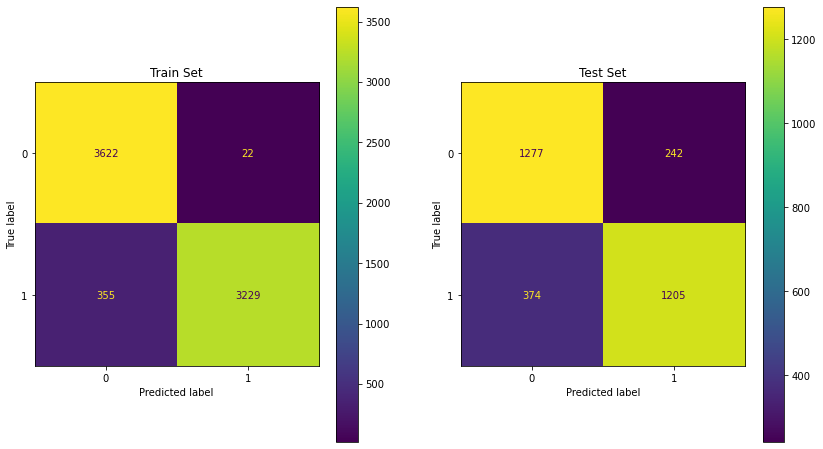

In [105]:
model = KNeighborsClassifier(n_neighbors=2,weights='uniform')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

display(performance_log)

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [110]:
scores=cross_val_score(model, X_train, y_train, cv=10)
scores

array([0.78976487, 0.76763485, 0.78146611, 0.75518672, 0.76210235,
       0.75656985, 0.78699862, 0.77731674, 0.78393352, 0.7867036 ])